# Bank Marketing Decision Tree Classifier

This notebook builds a decision tree classifier to predict whether a client will subscribe to a term deposit based on various features from the Bank Marketing dataset.

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our dataset.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Set style for visualizations
sns.set_theme()
plt.style.use('default')

In [3]:
# Load the dataset with explicit encoding
df = pd.read_csv('./Dataset/bank-full.csv', sep=';', encoding='latin-1')

# Check the column names to see what we're working with
print("Column names in the dataset:")
print(df.columns.tolist())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows:")
df.head()

Column names in the dataset:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2. Data Preprocessing

Let's prepare our data for the decision tree classifier by handling categorical variables and splitting the data.

In [4]:
# Function to encode categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

# Encode categorical variables
df_encoded = encode_categorical(df.copy())

# Split features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (36168, 16)
Testing set shape: (9043, 16)


## 3. Exploratory Data Analysis

Let's explore our data to understand the distributions and relationships.

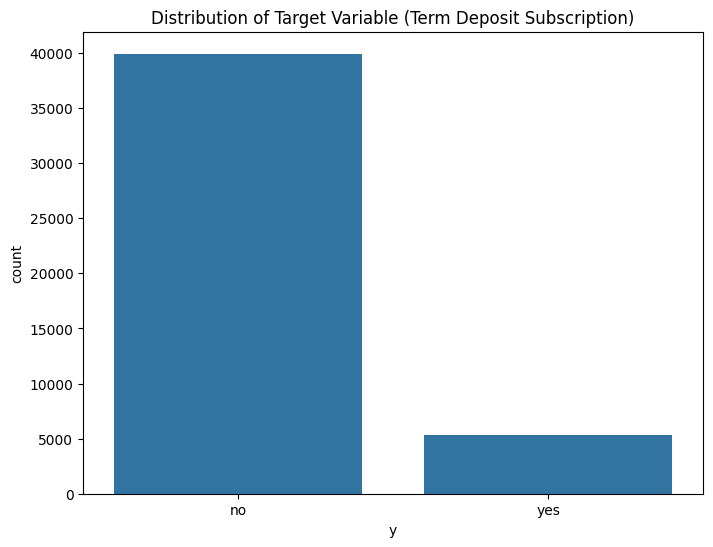


Target Distribution:
no: 88.30%
yes: 11.70%


In [5]:
# Plot target distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.show()

# Calculate target distribution percentages
target_dist = df['y'].value_counts(normalize=True) * 100
print("\nTarget Distribution:")
for label, percentage in target_dist.items():
    print(f"{label}: {percentage:.2f}%")

## 4. Building the Decision Tree Classifier

Now let's create and train our decision tree model.

In [6]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Print model performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8935087913303107

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



## 5. Model Visualization and Feature Importance

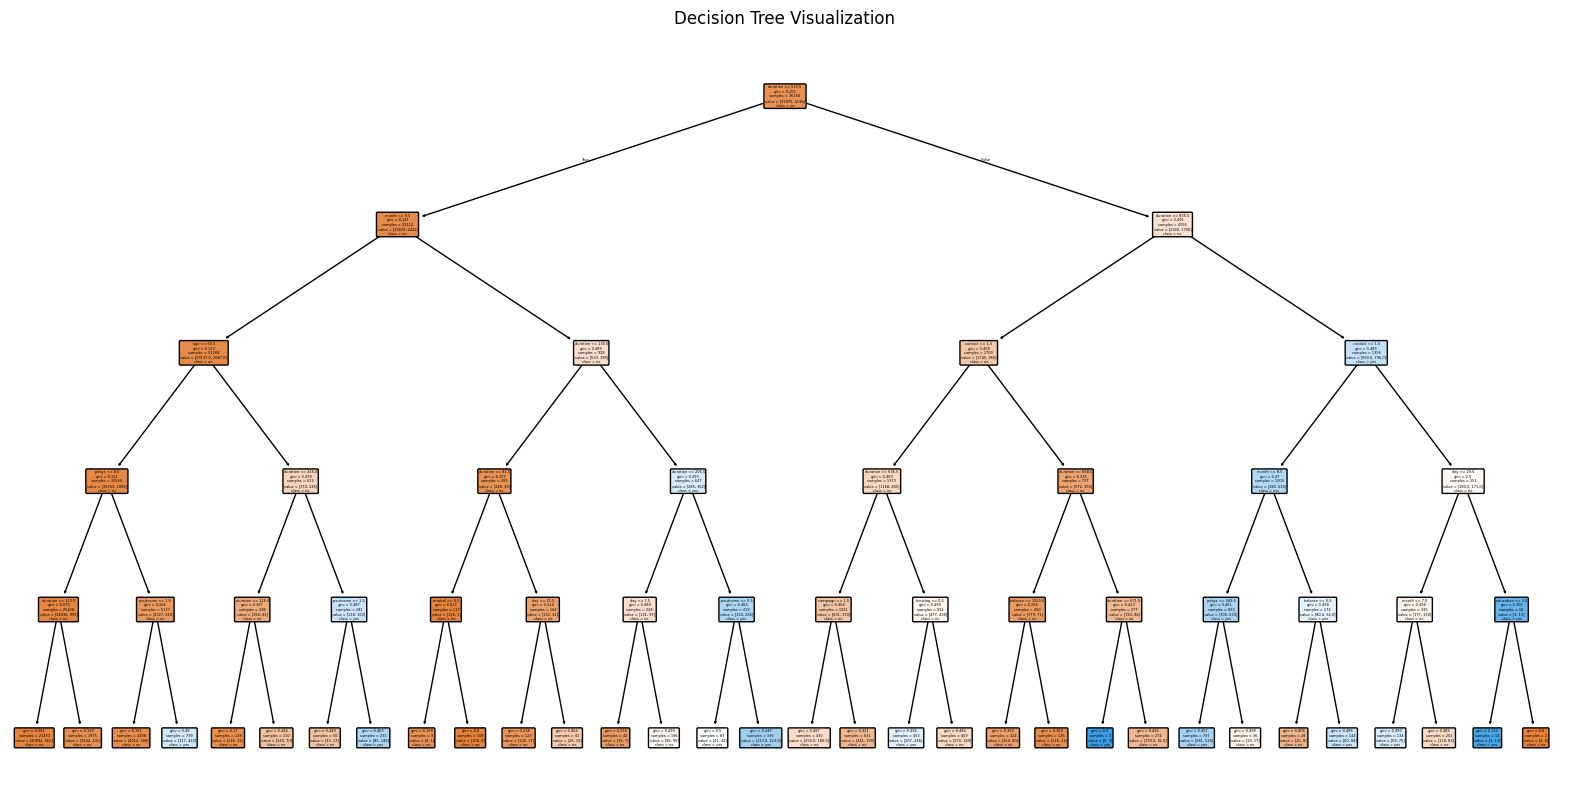

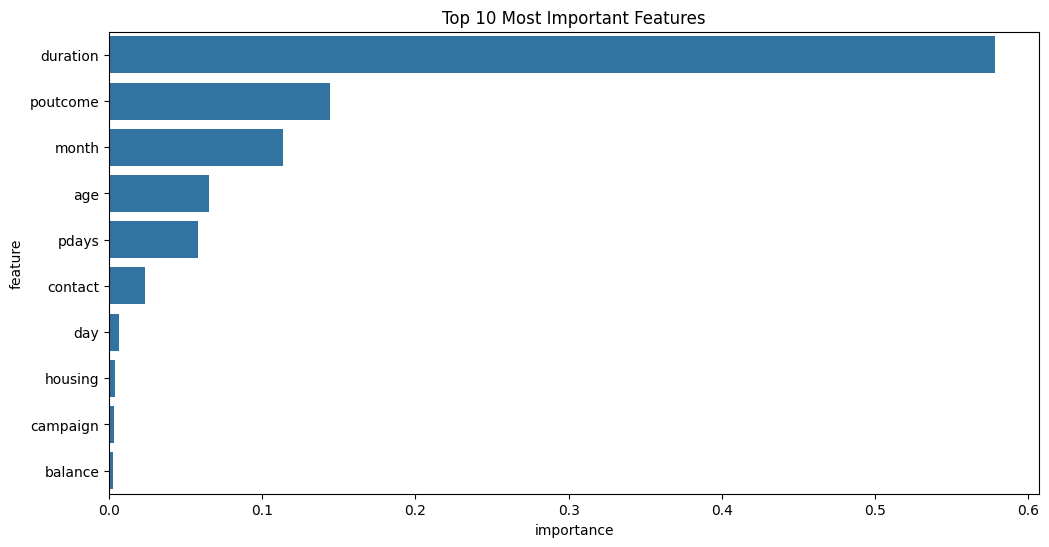

In [7]:
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['no', 'yes'], 
          filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

## 6. Model Evaluation

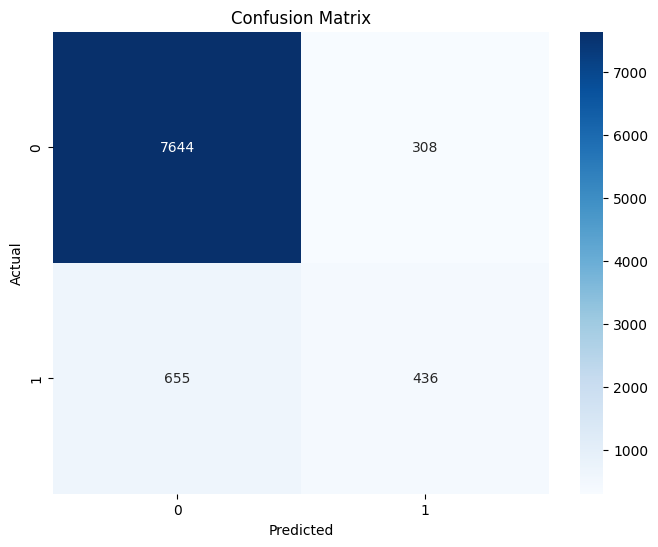


Additional Metrics:
Precision: 0.5860
Recall: 0.3996
F1 Score: 0.4752


In [8]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")